In [1]:
import pandas as pd
df = pd.read_csv('parkinsons_updrs.csv')
df.head()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,motor_UPDRS,total_UPDRS
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,28.199,34.398
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,28.447,34.894
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,28.695,35.389
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,28.905,35.810
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,29.187,36.375


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df = df[df["test_time"] > 0]

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
 
def printPredictions(y_true,y_pred, count):
  print(f"Predictions: ")
  print(y_true.assign(
      motor_UPDRS_pred = y_pred[:,0],
      total_UPDRS_pred = y_pred[:,1]   
  ).head(count).to_markdown(index = False))
 
def showResults(y_true, y_pred, count = 5):
  print("R2 score: ",r2_score(y_true,y_pred))
  print("Mean squared error: ",mean_squared_error(y_true,y_pred))
  print("Mean absolute error: ",mean_absolute_error(y_true,y_pred))
  printPredictions(y_true,y_pred, count)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:-2], df.iloc[:,-2:], test_size = 0.2, random_state = 42)
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(4690, 19) (1173, 19)
(4690, 2) (1173, 2)


In [5]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
showResults(y_test,linear.predict(X_test))

R2 score:  0.1695022116547909
Mean squared error:  74.29070558685558
Mean absolute error:  7.1690120966332955
Predictions: 
|   motor_UPDRS |   total_UPDRS |   motor_UPDRS_pred |   total_UPDRS_pred |
|--------------:|--------------:|-------------------:|-------------------:|
|        18     |        26.968 |            18.7706 |            26.0485 |
|        11.088 |        13.088 |            13.6305 |            16.7626 |
|        22.178 |        25.904 |            18.4737 |            25.3165 |
|        34.012 |        42.81  |            23.1928 |            30.0888 |
|        17.334 |        22.953 |            18.8382 |            24.8035 |


Feature: 0, Score: 0.19619
Feature: 1, Score: -1.02612
Feature: 2, Score: 0.01167
Feature: 3, Score: 254.77089
Feature: 4, Score: -62109.72913
Feature: 5, Score: -12999.25228
Feature: 6, Score: -262.66163
Feature: 7, Score: 4437.49584
Feature: 8, Score: 118.73769
Feature: 9, Score: -5.74129
Feature: 10, Score: -2147.43111
Feature: 11, Score: -114.95196
Feature: 12, Score: 71.58733
Feature: 13, Score: 668.19628
Feature: 14, Score: -9.05008
Feature: 15, Score: -0.40503
Feature: 16, Score: 1.78739
Feature: 17, Score: -22.74371
Feature: 18, Score: 17.11166
Feature: 0, Score: 0.30321
Feature: 1, Score: -2.65634
Feature: 2, Score: 0.01683
Feature: 3, Score: 15.68101
Feature: 4, Score: -63105.45931
Feature: 5, Score: -13385.45328
Feature: 6, Score: -325.77131
Feature: 7, Score: 4745.57336
Feature: 8, Score: 114.96734
Feature: 9, Score: -7.81569
Feature: 10, Score: -8120.24587
Feature: 11, Score: -46.78725
Feature: 12, Score: 52.12047
Feature: 13, Score: 2642.79920
Feature: 14, Score: -13.2362

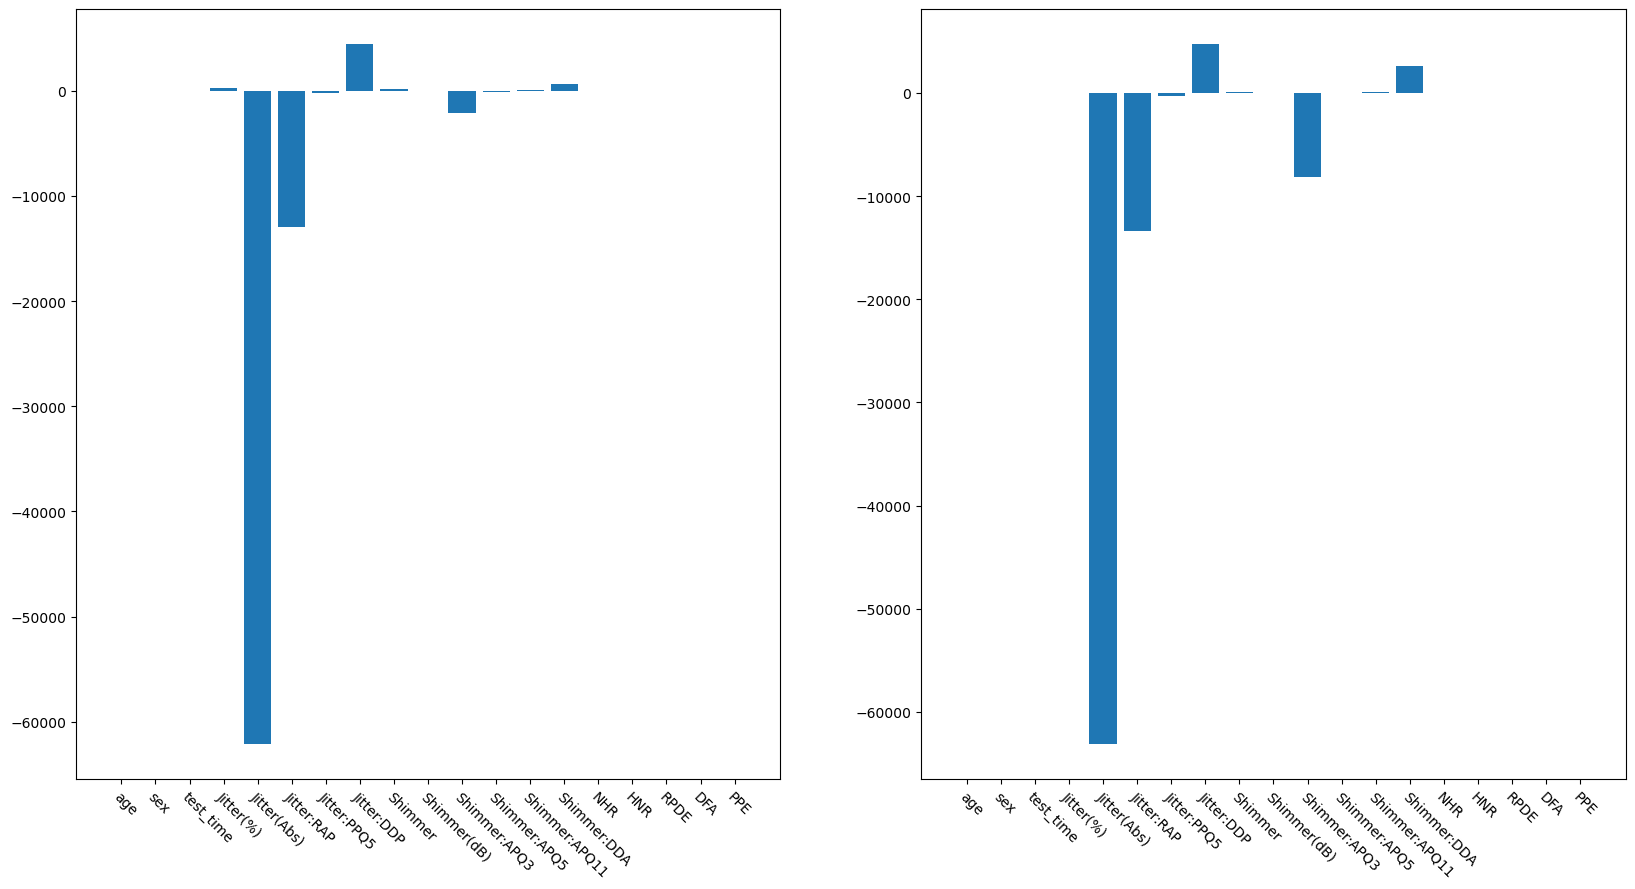

In [6]:
index = ["age", "sex", "test_time", "Jitter(%)", "Jitter(Abs)", "Jitter:RAP", "Jitter:PPQ5", "Jitter:DDP", "Shimmer", "Shimmer(dB)", "Shimmer:APQ3", 
        "Shimmer:APQ5",	"Shimmer:APQ11", "Shimmer:DDA",	"NHR", "HNR", "RPDE", "DFA", "PPE"]


import matplotlib.pyplot as pyplot
fig, axes = pyplot.subplots(1, 2)
fig.set_size_inches(20, 10)

importance = linear.coef_
importance_1 = importance[0, :]
importance_2 = importance[1, :]

# summarize feature importance
for i,v in enumerate(importance_1):
 print('Feature: %0d, Score: %.5f' % (i,v))
for i,v in enumerate(importance_2):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
axes[0].bar([x for x in index], importance_1)
pyplot.setp(axes[0].get_xticklabels(), rotation=-45, ha="left",
             rotation_mode="anchor")

# plot feature importance
axes[1].bar([x for x in index], importance_2)
pyplot.setp(axes[1].get_xticklabels(), rotation=-45, ha="left",
             rotation_mode="anchor")
pyplot.show()

In [7]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor()
rdf.fit(X_train,y_train)
showResults(y_test,rdf.predict(X_test))

R2 score:  0.9755004821148352
Mean squared error:  2.2051865736924983
Mean absolute error:  0.6268520034100593
Predictions: 
|   motor_UPDRS |   total_UPDRS |   motor_UPDRS_pred |   total_UPDRS_pred |
|--------------:|--------------:|-------------------:|-------------------:|
|        18     |        26.968 |            17.9812 |            26.9323 |
|        11.088 |        13.088 |            10.9872 |            13.0013 |
|        22.178 |        25.904 |            21.687  |            25.8656 |
|        34.012 |        42.81  |            33.9046 |            42.4597 |
|        17.334 |        22.953 |            16.797  |            22.3716 |


Feature: 0, Score: 0.67595
Feature: 1, Score: 0.07727
Feature: 2, Score: 0.07130
Feature: 3, Score: 0.00212
Feature: 4, Score: 0.01455
Feature: 5, Score: 0.00305
Feature: 6, Score: 0.00208
Feature: 7, Score: 0.00272
Feature: 8, Score: 0.00325
Feature: 9, Score: 0.00428
Feature: 10, Score: 0.00491
Feature: 11, Score: 0.00610
Feature: 12, Score: 0.00492
Feature: 13, Score: 0.00410
Feature: 14, Score: 0.00316
Feature: 15, Score: 0.01219
Feature: 16, Score: 0.01268
Feature: 17, Score: 0.08769
Feature: 18, Score: 0.00768


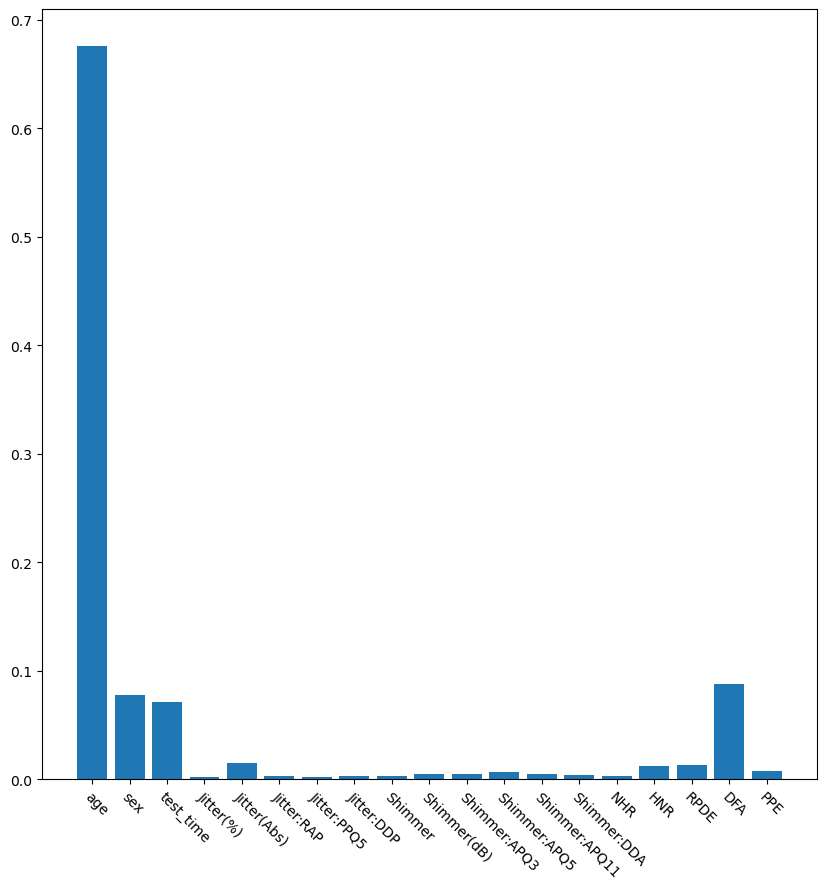

In [8]:
import matplotlib.pyplot as pyplot
fig, ax = pyplot.subplots()
fig.set_size_inches(10, 10)

importance = rdf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
ax.bar([x for x in index], importance)
pyplot.setp(ax.get_xticklabels(), rotation=-45, ha="left",
             rotation_mode="anchor")
pyplot.show()

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
extra_reg = ExtraTreesRegressor()
extra_reg.fit(X_train,y_train)
showResults(y_test,extra_reg.predict(X_test))

R2 score:  0.9803894778750649
Mean squared error:  1.763386499573825
Mean absolute error:  0.6896817127024716
Predictions: 
|   motor_UPDRS |   total_UPDRS |   motor_UPDRS_pred |   total_UPDRS_pred |
|--------------:|--------------:|-------------------:|-------------------:|
|        18     |        26.968 |            17.6719 |            26.5115 |
|        11.088 |        13.088 |            11.1589 |            13.1594 |
|        22.178 |        25.904 |            21.8516 |            26.0088 |
|        34.012 |        42.81  |            34.1386 |            42.8932 |
|        17.334 |        22.953 |            17.3433 |            23.1515 |


Feature: 0, Score: 0.62417
Feature: 1, Score: 0.08713
Feature: 2, Score: 0.06279
Feature: 3, Score: 0.00496
Feature: 4, Score: 0.01866
Feature: 5, Score: 0.00483
Feature: 6, Score: 0.00537
Feature: 7, Score: 0.00543
Feature: 8, Score: 0.00822
Feature: 9, Score: 0.00678
Feature: 10, Score: 0.00669
Feature: 11, Score: 0.00767
Feature: 12, Score: 0.00684
Feature: 13, Score: 0.00744
Feature: 14, Score: 0.00752
Feature: 15, Score: 0.02433
Feature: 16, Score: 0.02651
Feature: 17, Score: 0.07173
Feature: 18, Score: 0.01290


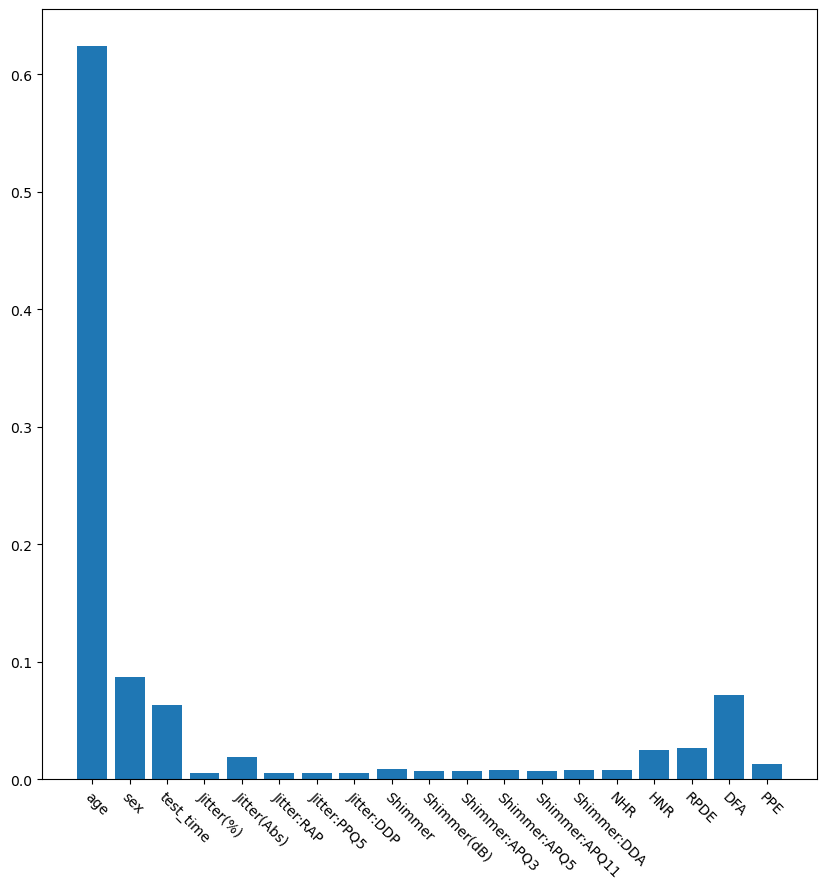

In [10]:
import matplotlib.pyplot as pyplot
fig, ax = pyplot.subplots()
fig.set_size_inches(10, 10)

importance = extra_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
ax.bar([x for x in index], importance)
pyplot.setp(ax.get_xticklabels(), rotation=-45, ha="left",
             rotation_mode="anchor")
pyplot.show()

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
showResults(y_test,knn.predict(X_test))

R2 score:  0.5245197752322595
Mean squared error:  42.2538651662943
Mean absolute error:  4.767536947996586
Predictions: 
|   motor_UPDRS |   total_UPDRS |   motor_UPDRS_pred |   total_UPDRS_pred |
|--------------:|--------------:|-------------------:|-------------------:|
|        18     |        26.968 |            14.4348 |            19.696  |
|        11.088 |        13.088 |            11.0874 |            13.0874 |
|        22.178 |        25.904 |            25.389  |            30.511  |
|        34.012 |        42.81  |            31.431  |            39.5766 |
|        17.334 |        22.953 |            15.2628 |            21.7472 |


In [14]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
 
svm_multi = MultiOutputRegressor(SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))
svm_multi.fit(X_train,y_train)
showResults(y_test,svm_multi.predict(X_test))

R2 score:  0.7988785418738004
Mean squared error:  17.79332672889405
Mean absolute error:  2.069184533999553
Predictions: 
|   motor_UPDRS |   total_UPDRS |   motor_UPDRS_pred |   total_UPDRS_pred |
|--------------:|--------------:|-------------------:|-------------------:|
|        18     |        26.968 |            17.8662 |            26.8435 |
|        11.088 |        13.088 |            11.2619 |            13.454  |
|        22.178 |        25.904 |            23.45   |            27.6616 |
|        34.012 |        42.81  |            34.1    |            42.5883 |
|        17.334 |        22.953 |            12.7476 |            19.4979 |
